In [20]:
x = [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
y = [52.0, 55.5, 61.0, 64.0, 68.0, 74.0, 78.0, 83.0, 88.0, 94.0]

In [21]:
def lcg_next():
    if not hasattr(lcg_next, "seed"):
        lcg_next.seed = 12345
    a = 1664525
    c = 1013904223
    m = 2**32
    lcg_next.seed = (a * lcg_next.seed + c) % m
    return lcg_next.seed

def lcg_randint(low, high):
    span = high - low + 1
    m = 2**32
    limit = (m // span) * span
    while True:
        r = lcg_next()
        if r < limit:
            return low + (r % span)

In [22]:
def predictions(features, weight, bias):
    predicted_labels = []
    for i in range(len(features)):
        value = features[i]*weight + bias
        predicted_labels.append(value)
    return predicted_labels

def calc_mse(labels, predicted_labels):
    MSE = 0
    n_samples = len(labels)
    for i in range(n_samples):
        square_error = (labels[i] - predicted_labels[i])**2
        MSE += square_error
    MSE = 1/n_samples * MSE
    return MSE

def gradient_weight(features, labels, predicted_labels, example):
    n_samples = len(labels)
    grad_w = 0
    i = example
    error= predicted_labels[i]-labels[i]
    grad_w += features[i]* error
    grad_w = 2/n_samples * grad_w
    return grad_w

def gradient_bias(labels, predicted_labels, example):
    n_samples = len(labels)
    grad_b = 0
    i =  example
    error = (predicted_labels[i]-labels[i])
    grad_b += error
    grad_b = 2/n_samples * grad_b
    return grad_b

def update_weight(learning_rate, weight_gradient, weight):
    new_weight = weight - learning_rate * weight_gradient
    return new_weight

def update_bias(learning_rate, bias_gradient, bias):
    new_bias = bias - learning_rate * bias_gradient
    return new_bias

def Train(features, labels, weight, bias, learning_rate, epochs):
    predicted_labels = predictions(features, weight, bias)
    loss_history = []
    for i in range(epochs):
        example = lcg_randint(0, len(labels)-1)
        grad_w = gradient_weight(features, labels, predicted_labels, example)
        grad_b = gradient_bias(labels, predicted_labels, example)
        weight = update_weight(learning_rate, grad_w, weight)
        bias = update_bias(learning_rate, grad_b, bias)
        predicted_labels = predictions(features, weight, bias)
        MSE = calc_mse(labels, predicted_labels)
        loss_history.append(MSE)
    return weight, bias, loss_history


In [23]:
w = 0
b = 0
lr = 0.001
epochs = 100000

w, b, loss_history = Train(x, y, w, b, lr, epochs)

print(w, b)
y_pred = predictions(x, w, b)
MSE = calc_mse(y, y_pred)
print(MSE)
print(loss_history)

4.723065118447879 45.62816953636971
0.8130841108668609
[5186.78532256, 5073.598732162228, 5015.838939993552, 4906.890533796329, 4896.958270547968, 4877.47509953019, 4752.4236714148155, 4711.018937289386, 4591.008204207697, 4523.668198550833, 4514.262939079435, 4448.107892233794, 4336.03682070447, 4208.131476907701, 4180.828047401866, 4119.835395900109, 4093.0234398855655, 4006.8802398995367, 3936.660825633102, 3901.9626647225778, 3857.6349127160365, 3841.4355779974694, 3816.1839175157447, 3782.4896587680487, 3716.6942741239454, 3662.9002762959994, 3599.466966932957, 3567.584010288928, 3506.031872633866, 3455.5150010607595, 3396.175839587797, 3302.134769097979, 3264.7694985952076, 3198.976630048603, 3124.3243355109666, 3061.9746341273813, 3027.4193316256515, 3014.004651622719, 2963.3830832368994, 2884.768731493179, 2836.69985783703, 2781.3772074531776, 2774.6070229086163, 2702.6707607522562, 2672.3481210642476, 2660.1863514280653, 2653.6213421590487, 2629.8069457510064, 2600.34632743185

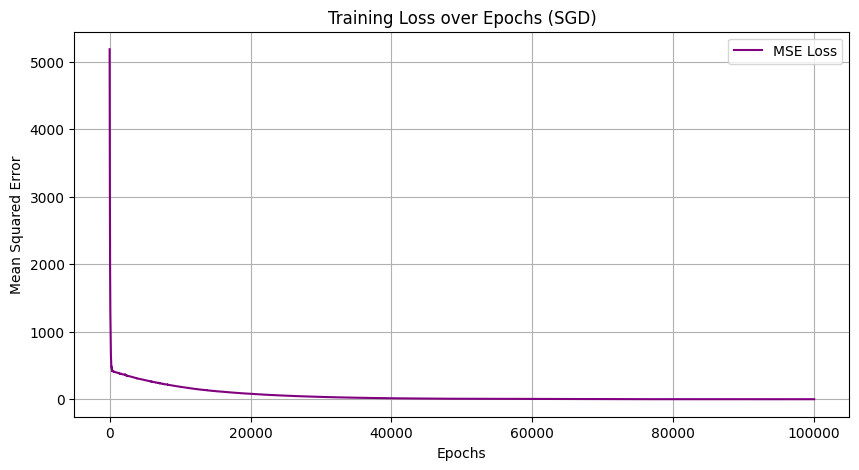

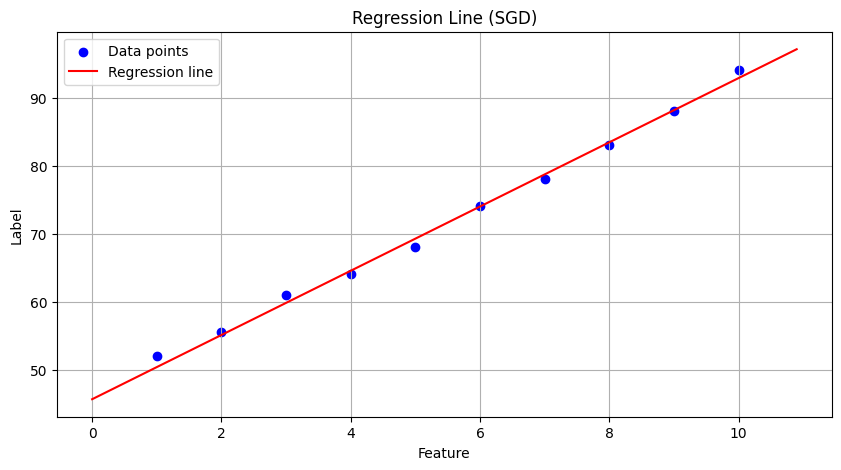

In [24]:
import matplotlib.pyplot as plt

# ---------- Plot 1: Loss over epochs ----------
plt.figure(figsize=(10,5))
plt.plot(range(len(loss_history)), loss_history, color='purple', linestyle='-', label='MSE Loss')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.title('Training Loss over Epochs (SGD)')
plt.legend()
plt.grid(True)
plt.show()

# ---------- Plot 2: Regression line with data ----------
plt.figure(figsize=(10,5))

# Scatter original data
features = x
labels = y
weight =  w
bias = b
plt.scatter(features, labels, color='blue', label='Data points')

# Regression line
x_line = [min(features)-1 + i*0.1 for i in range(int((max(features)-min(features)+2)*10))]
y_line = [weight*x + bias for x in x_line]
plt.plot(x_line, y_line, color='red', linestyle='-', label='Regression line')

plt.xlabel('Feature')
plt.ylabel('Label')
plt.title('Regression Line (SGD)')
plt.legend()
plt.grid(True)
plt.show()
